# 1. Introduction and Background

The definition of delay itself can be understood as a delay. In the context of flight, the meaning of delay is the delay in the flight schedule from the predetermined time. This could happen because there are several factors. Of course, this will cause inconvenience, especially for passengers who want to get to their destination as soon as possible.

This study will examine the insights and patterns in flight delays based on Airline On Time Data from 2007 to 2008

# 2. Dataset

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading dataset of 2007 and 2008

In [ ]:
df1 = pd.read_csv('2007.csv')
df2 = pd.read_csv('2008.csv')
df = df2.append(df1, ignore_index = True)
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
5,2008,1,3,4,2024.0,2020,2325.0,2325,WN,51,...,13.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1753.0,1745,2053.0,2050,WN,940,...,6.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,2008,1,3,4,622.0,620,935.0,930,WN,2621,...,7.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,1944.0,1945,2210.0,2215,WN,389,...,7.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1453.0,1425,1716.0,1650,WN,519,...,6.0,13.0,0,NaN,0,11.0,0.0,0.0,0.0,15.0


See the items in dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9842432 entries, 0 to 9842431
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 2.1+ GB


The dataset contain 29 features from 9.8 million of observations. Based on variabel descriptions they are:
- Year [int]: Year of the dataset (2007 & 2008)
- Month [int]: Month of the observation (1 - Jan, 2 - Feb, etc.)
- DayofMonth [int]: Day of the month (1 - 31, if applicable)
- DayOfWeek [int]: Day of the week (1 - Mon, 2 - Tue, etc.)
- DepTime [int]: Actual departure time (local time zone %H%M format)
- CRSDepTime [int]: Scheduled departure time (local time zone %H%M format)
- ArrTime [int]: Actual arrival time (local time zone %H%M format)
- CRSArrTime [int]: Scheduled arrival time (local time zone %H%M format)
- UniqueCarrier [int]: Unique carrier code to identify the carriers in carriers.csv
- FlightNum [int]: Flight number
- TailNum [str]: Unique tail number to identify the planes in plane-data.csv
- ActualElapsedTime [int]: Difference between ArrTime and DepTime in minutes, also sum of AirTime, TaxiIn, TaxiOut
- CRSElapsedTime [int]: Difference between CRSArrTime and CRSDepTime in minutes
- AirTime [int]: Air time in minutes
- ArrDelay [int]: Difference between ArrTime and CRSArrTime in minutes
- DepDelay [int]: Difference between DepTime and CRSDepTime in minutes
- Origin [str]: Unique IATA airport code that flight was departed from, can be identified in airports.csv
- Dest [str]: Unique IATA airport code for flight destination, can be identified in airports.csv
- Distance [int]: Flight distance in miles
- TaxiIn [int]: Taxi-in time in minutes
- TaxiOut [int]: Taxi-out time in minutes
- Cancelled [int]: Flight cancellation (1 - Cancelled, 0 - Not Cancelled)
- CancellationCode [str]: Flight cancellation reason (A - Carrier, B - Weather, C - National Aviation System, D - Security)
- Diverted [int]: Fight diverted (1 - Diverted, 0 - Not diverted)
- CarrierDelay [int]: Delay caused by carrier in minutes
- WeatherDelay [int]: Delay caused by weather in minutes
- NASDelay [int]: Delay caused by National Aviation System in minutes
- LateAircraftDelay [int]: Delay caused by previous late flight arrivals in minutes

based on the dataset, there are another additional information:

In [ ]:
df_airports = pd.read_csv('airports.csv')
df_carriers = pd.read_csv('carriers.csv')
df_plane = pd.read_csv('plane-data.csv')

In [ ]:
df_airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [ ]:
df_carriers.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [ ]:
df_plane.head() #head only covers nan value

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_plane.tail() #tail seems cover something 

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998
5028,N999DN,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992


Based on additional information, df_airports will be used as airports info, df_carriers will be used as carriers info, and df_plane will be used as manufacturing info of the air plane

### The best time of day, day of the week, and time of year to fly to minimise delays?

The delay will be calculated by finding the difference between ActualElapsedTime and CRSElapsedTime.

In [ ]:
df["delay"] = df["ActualElapsedTime"] - df["CRSElapsedTime"]

Because of the departure time are in float type data, we need to convert it into range of hours. 

In [ ]:
def dep_h(hr):
    return "00" if str(hr)[:-2] == "24" else str(hr)[:-2].zfill(2)

df['departure_hours'] = df["CRSDepTime"].apply(dep_h)

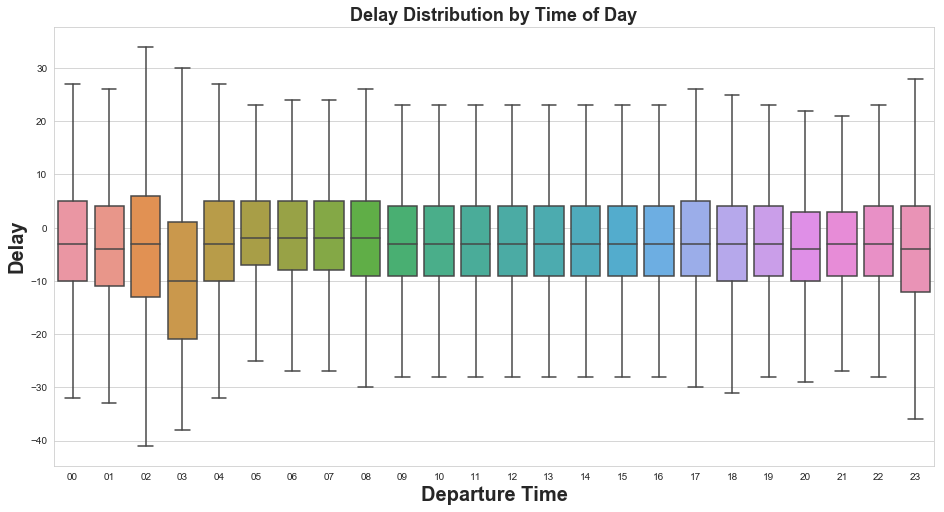

In [ ]:
sns.set_style("whitegrid")
fig1, ax1 = plt.subplots(figsize=(13, 7), constrained_layout=True)
ax1 = sns.boxplot(x="departure_hours", y="delay", order=np.sort(df["departure_hours"].unique()), data=df[["delay", "departure_hours"]], showfliers=False)
ax1.set_title("Delay Distribution by Time of Day", fontdict={"weight": "bold", "fontsize": 18})
ax1.set_xlabel("Departure Time", fontdict={"weight": "bold", "fontsize": 20})
ax1.set_ylabel("Delay", fontdict={"weight": "bold", "fontsize": 20})
pass

From the results above, most of the departure time has -3 minutes delay with the variability of delay up to 30 minutes. The departure time at 5 am has the lowest variability with median -2 minutes. Thus, the best departure time to take flight to minimise delay is at 5 am.

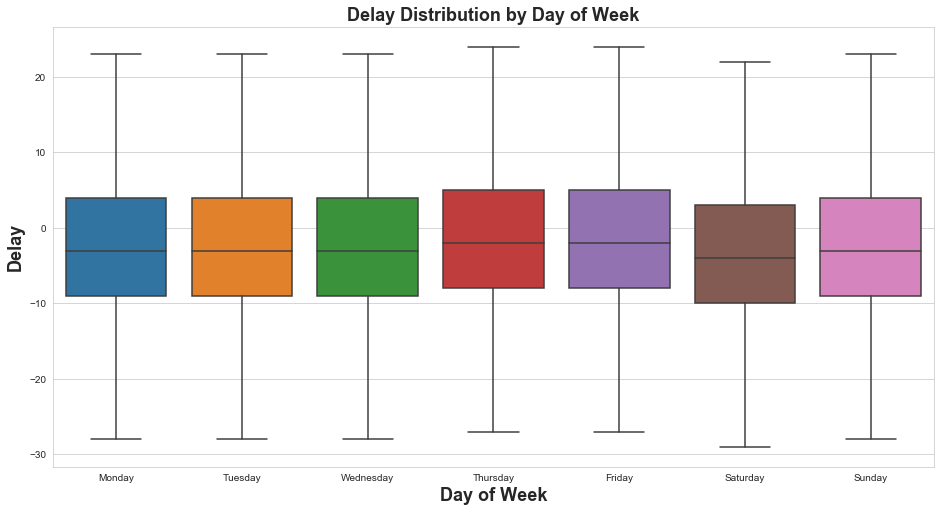

In [ ]:
sns.set_style("whitegrid")
fig2, ax2 = plt.subplots(figsize=(13, 7), constrained_layout=True)
ax2 = sns.boxplot(x="DayOfWeek", y="delay", order=np.sort(df["DayOfWeek"].unique()), data=df[["delay", "DayOfWeek"]], showfliers=False)
ax2.set_title("Delay Distribution by Day of Week", fontdict={"weight": "bold", "fontsize": 18})
ax2.set_xlabel("Day of Week", fontdict={"weight": "bold", "fontsize": 18})
ax2.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
ax2.set_ylabel("Delay", fontdict={"weight": "bold", "fontsize": 18})
pass

Based on day of the week, the best time of day of week are thursday and friday with median -2 minutes delay.

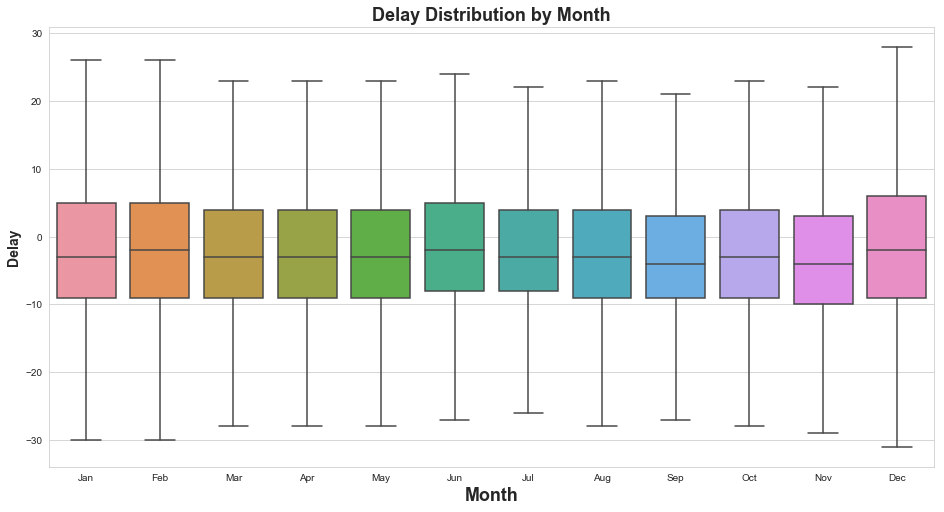

In [ ]:
sns.set_style("whitegrid")
fig3, ax3 = plt.subplots(figsize=(13, 7), constrained_layout=True)
ax3 = sns.boxplot(x="Month", y="delay", order=np.sort(df["Month"].unique()), data=df[["delay", "Month"]], showfliers=False)
ax3.set_title("Delay Distribution by Month", fontdict={"weight": "bold", "fontsize": 18})
ax3.set_xlabel("Month", fontdict={"weight": "bold", "fontsize": 18})
ax3.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax3.set_ylabel("Delay", fontdict={"weight": "bold", "fontsize": 14})
pass

Based on the delay distribution by month, the best time is at may with median -2 minutes delay and lowest delay variability.

### Do older planes suffer more delays?

We can get the plane manufacturing year from df_plane by matching the tailnum with year

In [ ]:
df_question2 = pd.merge(df[["TailNum", "delay"]], df_plane[["tailnum", "year"]], left_on="TailNum", right_on="tailnum")

In [ ]:
df_question2.dropna(inplace = True)

In [ ]:
df_question2.isnull().sum()

TailNum    0
delay      0
tailnum    0
year       0
dtype: int64

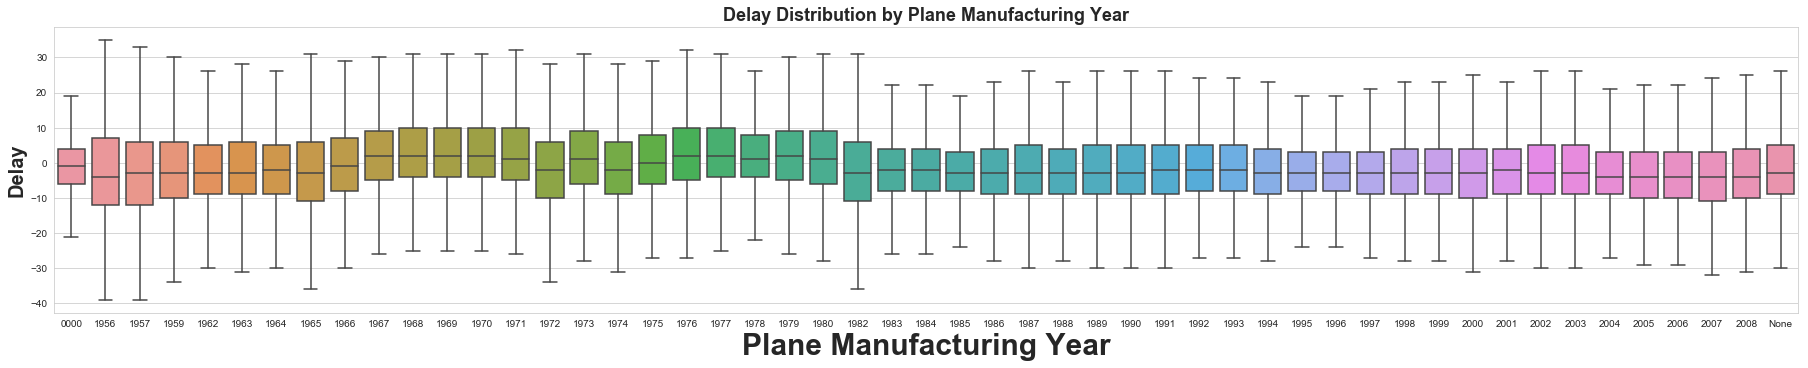

In [ ]:
sns.set_style("whitegrid")
fig1, ax1 = plt.subplots(figsize=(25, 5), constrained_layout=True)
ax1 = sns.boxplot(x="year", y="delay", order=np.sort(df_question2["year"].unique()), data=df_question2[["delay", "year"]], showfliers=False)
ax1.set_title("Delay Distribution by Plane Manufacturing Year", fontdict={"weight": "bold", "fontsize": 18})
ax1.set_xlabel("Plane Manufacturing Year", fontdict={"weight": "bold", "fontsize": 30})
ax1.set_ylabel("Delay", fontdict={"weight": "bold", "fontsize": 20})
pass

Based on plane manufacturing year, there are no linear pattern between delay time and plane manufacturing year. Delay variability has no significance difference between older and newer plane.

### How does the number of people flying between different locations change over time?

We need to get month year to know the change over time

In [ ]:
df["month_year"] = df["Year"].astype(str) + "-" + df["Month"].astype(str).str.zfill(2)

In [ ]:
df_question3 = df[['month_year', 'Origin', 'Dest']]

In [ ]:
df_question3['route'] = df['Origin'] + ' - ' + df['Dest']

In [ ]:
df_question3.head()

,month_year,Origin,Dest,route
0,2008-01,HOU,LIT,HOU - LIT
1,2008-01,HOU,MAF,HOU - MAF
2,2008-01,HOU,MAF,HOU - MAF
3,2008-01,HOU,MCO,HOU - MCO
4,2008-01,HOU,MCO,HOU - MCO


In [ ]:
ctdf = (df_question3.reset_index()
          .groupby(['month_year','route'], as_index=False)
          .count()
          .rename(columns={'index':'ct'})
       )

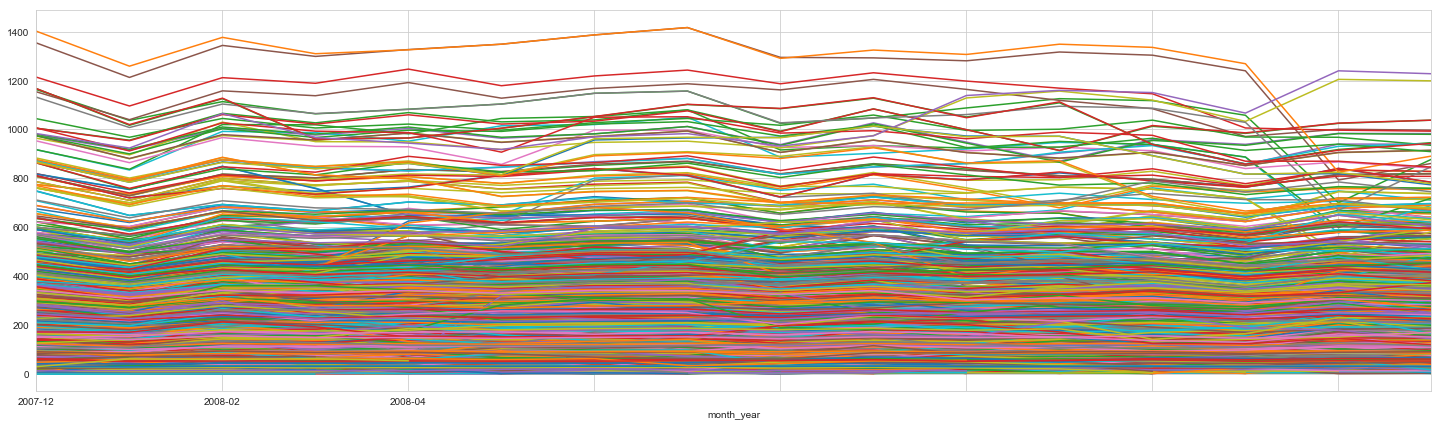

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

for key, data in ctdf.groupby('route'):
    data.plot(x='month_year', y='ct', ax=ax, label=key, legend = None, figsize=(25, 7))

Most of the flight routes don't have significance change over 2007 - 2008. Only 5-6 routes have significance drop at the end of 2008.

### Detect cascading failures as delays in one airport create delays in others?

In [ ]:
df_question4 = df[['month_year', 'Origin', 'Dest', 'delay']]

In [ ]:
ctdf = (df_question4.reset_index()
          .groupby(['month_year','Origin'], as_index=False)
          .sum()
          .rename(columns={'index':'ct'})
       )

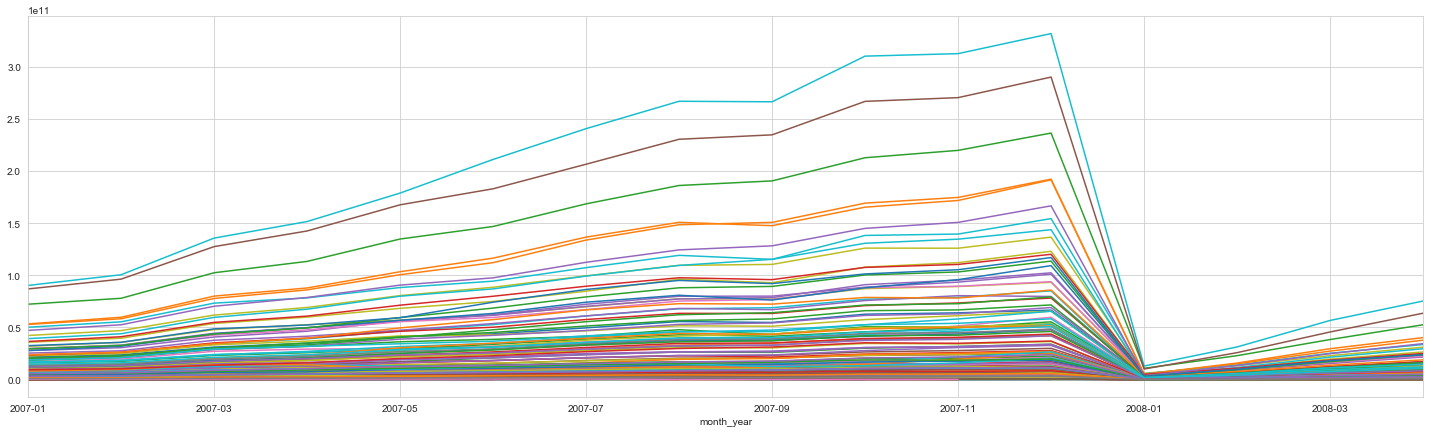

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

for key, data in ctdf.groupby('Origin'):
    data.plot(x='month_year', y='ct', ax=ax, label=key, legend = None, figsize=(25, 7))

Based on the airport origin delay, the total delay for some airport seems to be accumulated for the next day flights.

# 3. Performing Statistical Testing

First, we need to extract all data from df_airports for airports information and then keep several features for statistical testing

In [ ]:
a1 = df.sample(10000, random_state=1)
a2 = pd.merge(a1, df_airports, left_on="Origin", right_on="iata")
a3 = pd.merge(a2, df_airports, left_on="Dest", right_on="iata")
a3.rename(columns={"lat_x": "origin_lat", "long_x": "origin_long", "lat_y": "dest_lat", "long_y": "dest_long"}, inplace=True)

features = ["Year", "Month", "DayOfWeek", "CRSDepTime", "CRSArrTime", "CRSElapsedTime", "Distance", "origin_lat", "origin_long", "dest_lat", "dest_long"]
model_df = a3[features]
model_df["delay"] = a3["delay"]
model_df.dropna(inplace=True)

In [ ]:
import statsmodels.api as sm

y_train = model_df.pop('delay');
X_train = model_df;
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

E:\Software\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  delay   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     7.076
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           4.36e-12
Time:                        20:37:51   Log-Likelihood:                -39876.
No. Observations:                9751   AIC:                         7.978e+04
Df Residuals:                    9739   BIC:                         7.986e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1362.6982    798.908      1.

Through the results of the statistical test analysis above, it turns out that the results obtained are for the variables Distance, Dest_lat and CRSElapsedTime have a P value <0.05 so it can be said that it succeeds in rejecting the null hypothesis and it can be concluded that Distance, Dest_lat and CRSElapsedTime are not variables that cause flight delays. through the results above it turns out that the cause of flight delays is Origin_long, Month, Origin_lat.

# 4. Building Regression Model

Lets modelling the linear regression

### Delay vs CRSElapsedTime

In [ ]:
from sklearn.linear_model import LinearRegression

x = np.array(X_train["CRSElapsedTime"].values).reshape((-1, 1))
y = y_train

In [ ]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.004490364746385422
intercept: 0.662521803437192
slope: [-0.0138734]


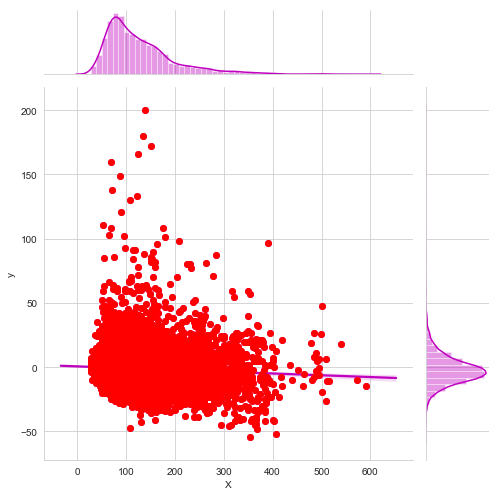

In [ ]:
df_train = pd.DataFrame(dict(X=x.ravel(), y=y))
g = sns.jointplot("X", "y", data=df_train, kind="reg", color="m", height=7)
g.ax_joint.plot(x, y, 'ro');

### Delay vs dest_lat

In [ ]:
from sklearn.linear_model import LinearRegression

x = np.array(X_train["dest_lat"].values).reshape((-1, 1))
y = y_train

In [ ]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.0004901011437226099
intercept: -3.189592088963547
slope: [0.05655494]


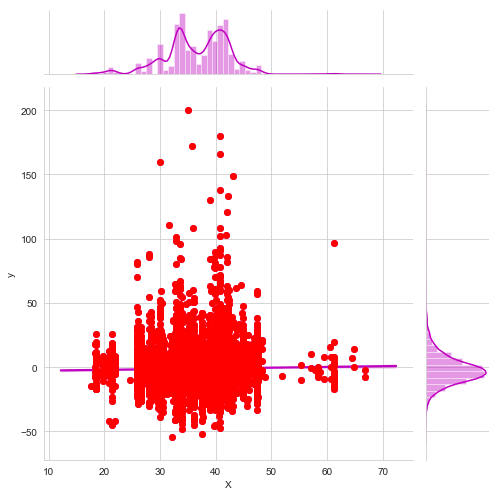

In [ ]:
df_train = pd.DataFrame(dict(X=x.ravel(), y=y))
g = sns.jointplot("X", "y", data=df_train, kind="reg", color="m", height=7)
g.ax_joint.plot(x, y, 'ro');

### Delay vs Distance

In [ ]:
from sklearn.linear_model import LinearRegression

x = np.array(X_train["Distance"].values).reshape((-1, 1))
y = y_train

In [ ]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.003442985592628789
intercept: -0.004731526006694908
slope: [-0.00153077]


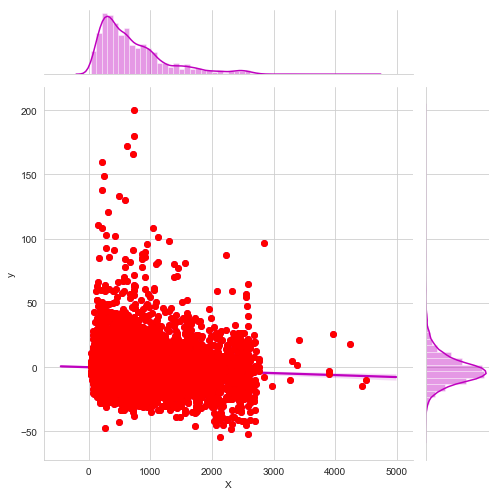

In [ ]:
df_train = pd.DataFrame(dict(X=x.ravel(), y=y))
g = sns.jointplot("X", "y", data=df_train, kind="reg", color="m", height=7)
g.ax_joint.plot(x, y, 'ro');